### Bike Price Prediction Using Linear Regression

#### Import Library

In [1]:
import numpy as np
import pandas as pd

#### Import Dataset

In [2]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv")

#### Get First five rows

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


#### Get Information of Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#### Get Missing Values drop

In [5]:
df=df.dropna()

#### Get Summary Statistics

In [6]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


#### Get Categories and counts of categorical variables

In [7]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [10]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

#### Get Column names

In [11]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

#### Get Shape of Dataframe

In [12]:
df.shape

(626, 8)

#### Get Encoding of Categorical Features

In [13]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [14]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

#### Define y and X

In [15]:
y=df['Selling_Price']

In [16]:
y.shape

(626,)

In [17]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [18]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [19]:
X.shape

(626, 5)

In [20]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#### Get Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=192529)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

#### Get Model Train

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

#### Get Model Prediction

In [27]:
y_pred=lr.predict(X_test)

In [28]:
y_pred.shape

(188,)

In [29]:
y_pred

array([ 46627.16991381, 126226.52020435, 126915.34894867,  67354.80411478,
        14813.39930485,  46839.77885268,  85518.32075127,  53095.29232366,
        68127.85769711,  28587.77796484,  79050.70224517,  52211.983991  ,
        35813.0092491 ,  73478.03413027, 101053.5517122 ,  58783.45424367,
        44251.72335478,  57618.47127664,  49530.81653209,    969.06834793,
        12470.37423743,  50015.50196141,  79981.17843473,  60819.8896093 ,
       127121.55648625,  45090.42775637,  27534.41258465,  25745.68146263,
        54519.38187873,  12568.2276864 ,  67610.61101219,  53287.27853584,
        61541.09898332, 132020.17533736,  56950.50773664,  13575.73029005,
        54163.62571073,  18486.44998155,  51586.64526732,  32456.18432159,
        46448.21480679,  64333.32340922,  34925.23777446,  20065.24364103,
        59695.55069931,  52721.21962322,  28345.76474152,  50505.89612146,
        64199.69905284, 111793.12449679,  53214.80453071,  29488.96481312,
        12312.99306955, 1

#### Get Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
mean_squared_error(y_test,y_pred)

174132867.80991462

In [32]:
mean_absolute_error(y_test,y_pred)

9591.28299548469

In [33]:
r2_score(y_test,y_pred)

0.8967333034110117

#### Get Visualization of Actual Vs Predicted Results

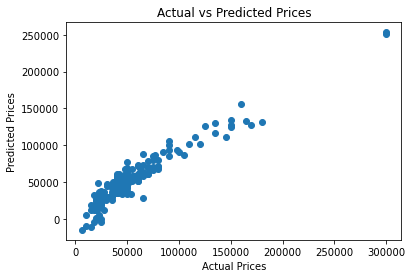

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

#### Get Future Predictions

In [35]:
df_new=df.sample(1)

In [36]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
239,Hero,Hero Glamour 125,55000,2017,0,0,2500,61600.0


In [37]:
df_new.shape

(1, 8)

In [38]:
X_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [39]:
y_pred_new=lr.predict(X_new)

In [40]:
y_pred_new

array([53214.80453071])